# ***Open Food Facts : analyses du jeu de données nettoyé***

On cherche maintenant à faire des analyses sur le jeu de données d'Open Food Facts après qu'il ai été nettoyé. on s'interesse donc d'abords à des analyses univariées et bivariées des variables. Ensuite on ferra une ACP pour vois s'il l'on arrive à dégager des caractéristiques principales dans nos produits. <br>
On cherchera à voir si notre application est faisable par la suite en devellopant les deux fonctions de base de l'application (noter les produits et suggerer des produits de remplacement pour le mauvais nutriscores) et regardant à quel genre d'erreurs on peut s'attendre. 

# ***Table des matières :***

*  Partie 1 : Analyses univariées
*  Partie 2 : Analyses bivariées
*  Partie 3 : Analyses analyses en composantes principales
*  Partie 4 : Fonctions prototypes


**Import et versions :**

In [ ]:
import numpy as np
import matplotlib as mtl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
import seaborn as sns
import pandas as pd
import scipy
import scipy.stats as stats
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("numpy version :", np.__version__)
print("matplotlib version :", mtl.__version__)
print("seaborn version :", sns.__version__)
print("pandas version :",pd.__version__)
print("scipy version :",scipy.__version__)
print("sklearn version :",sklearn.__version__)

numpy version : 1.21.6
matplotlib version : 3.2.2
seaborn version : 0.11.2
pandas version : 1.3.5
scipy version : 1.7.3
sklearn version : 1.0.2


**Changement des noms de colonnes en français :**

In [ ]:
df = pd.read_csv("drive/MyDrive/CSV/open_food_facts_bis.csv", sep=",", dtype={'code': 'str'})
df.rename(columns = {'code':'Code', 'product_name':'Produit', 'brands_tags':'Marque', 
                     'countries_tags':'Pays', 'pnns_groups_1':'Groupe', 'pnns_groups_2':'Sous-groupe',
                     'ingredients_text':'Etiquette', 'serving_size':'Contenance', 'additives_n':'Nombre d\'additifs', 
                     'ingredients_from_palm_oil_n':'Ingrédients provenant de l\'huile de palme', 'energy_100g':'Energie (kJ)',
                     'fat_100g':'Graisses', 'saturated-fat_100g':'Graisses saturées', 'carbohydrates_100g':'Glucides', 
                     'sugars_100g':'Sucres', 'fiber_100g':'Fibres', 'proteins_100g':'Protéines', 'salt_100g':'Sel', 
                     'sodium_100g':'Sodium', 'vitamin-a_100g':'Vitamine A','vitamin-c_100g':'Vitamine C', 
                     'calcium_100g':'Calcium', 'iron_100g':'Fer', 'fruits-vegetables-nuts_100g':'Fruits, Légumes, Noix', 
                     'nutrition_grade_fr':'Nutriscore', 'nutriscore':'Nutriscore (Numérique)'}, 
          inplace = True)
df.head(1)

Code                         Produit   Marque              Pays   Groupe  \
0  4530  Banana Chips Sweetened (Whole)  unknown  en:united-states  unknown   

  Sous-groupe                                          Etiquette  \
0     unknown  Bananas, vegetable oil (coconut oil, corn oil ...   

     Contenance  Nombre d'additifs  Ingrédients provenant de l'huile de palme  \
0  28 g (1 ONZ)                0.0                                        0.0   

   ...  Protéines  Sel  Sodium  Vitamine A  Vitamine C  Calcium      Fer  \
0  ...       3.57  0.0     0.0         0.0      0.0214      0.0  0.00129   

   Fruits, Légumes, Noix  Nutriscore  Nutriscore (Numérique)  
0                   90.0           d                    14.0  

[1 rows x 26 columns]

In [ ]:
nutri_cols = ['Energie (kJ)', 'Graisses', 'Graisses saturées', 'Glucides', 'Sucres','Protéines','Fibres',
              'Sel','Fruits, Légumes, Noix','Nutriscore', 'Nutriscore (Numérique)',
              'Nombre d\'additifs', 'Ingrédients provenant de l\'huile de palme', 
              'Sodium', 'Vitamine A', 'Vitamine C', 'Calcium','Fer']
nutricols = ['Energie (kJ)', 'Graisses', 'Graisses saturées', 'Glucides', 'Sucres',
             'Protéines','Fibres','Sel']

# **Partie 1 : Analyses univariées** 

**Composition du produit moyen :**

In [ ]:
df[['Nutriscore (Numérique)', 'Energie (kJ)']].mean()

Nutriscore (Numérique)       9.076276
Energie (kJ)              1125.536228
dtype: float64

Text(3, -8, 'Energie : 1125 kJ')

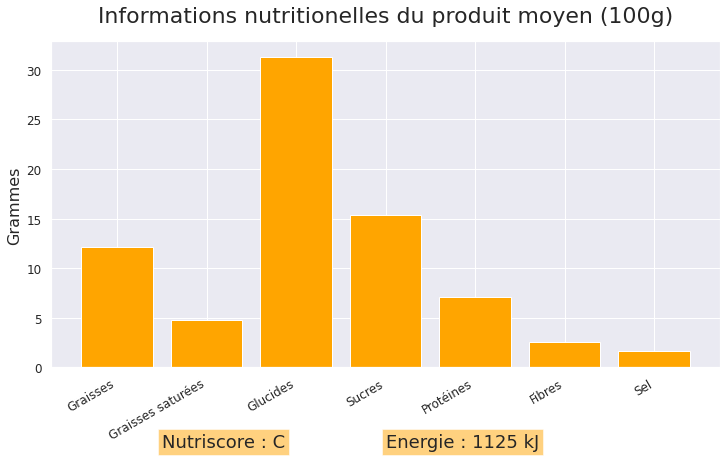

In [ ]:
#données
x = nutricols[1:]
y = df[nutricols].mean().values[1:]

#plot
sns.set()
fig, ax = plt.subplots(figsize = (12, 6))
plt.bar(x, y, color='orange')
plt.xticks(rotation=30, ha='right')
ax.tick_params(labelsize=12)
plt.ylabel('Grammes', fontsize=16)
plt.title('Informations nutritionelles du produit moyen (100g)', fontsize=22, y=1.04)
plt.text(0.5, -8, 'Nutriscore : C', fontsize = 18, bbox = dict(facecolor = 'orange', alpha = 0.5))
plt.text(3, -8, 'Energie : 1125 kJ', fontsize = 18, bbox = dict(facecolor = 'orange', alpha = 0.5))

Text(0.5, 1.04, 'Informations nutritionelles du produit moyen (100g)')

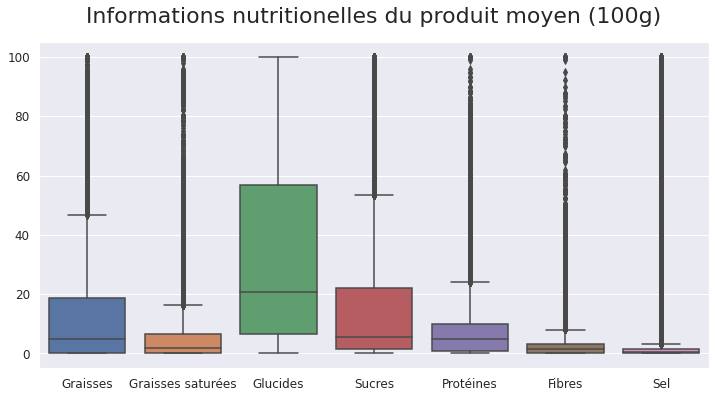

In [ ]:
#données
y = df[nutricols[1:]]

#plot
sns.set()
fig, ax = plt.subplots(figsize = (12, 6))
sns.boxplot(data=y)
ax.tick_params(labelsize=12)
plt.title('Informations nutritionelles du produit moyen (100g)', fontsize=22, y=1.04)

**Composition du produit moyen français :**

In [ ]:
france = df[df['Pays'].str.contains('france')]
france[['Nutriscore (Numérique)', 'Energie (kJ)']].mean()

Nutriscore (Numérique)       8.459462
Energie (kJ)              1115.749846
dtype: float64

Text(3, -8, 'Energie : 1115 kJ')

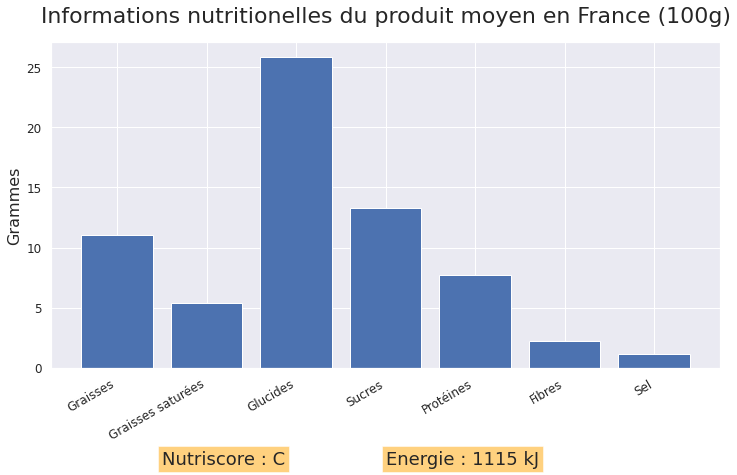

In [ ]:
#données
x = nutricols[1:]
y = france[nutricols].mean().values[1:]

#plot
sns.set()
fig, ax = plt.subplots(figsize = (12, 6))
plt.bar(x, y)
plt.xticks(rotation=30, ha='right')
ax.tick_params(labelsize=12)
plt.ylabel('Grammes', fontsize=16)
plt.title('Informations nutritionelles du produit moyen en France (100g)', fontsize=22, y=1.04)
plt.text(0.5, -8, 'Nutriscore : C', fontsize = 18, bbox = dict(facecolor = 'orange', alpha = 0.5))
plt.text(3, -8, 'Energie : 1115 kJ', fontsize = 18, bbox = dict(facecolor = 'orange', alpha = 0.5))

**France vs Moyenne :**

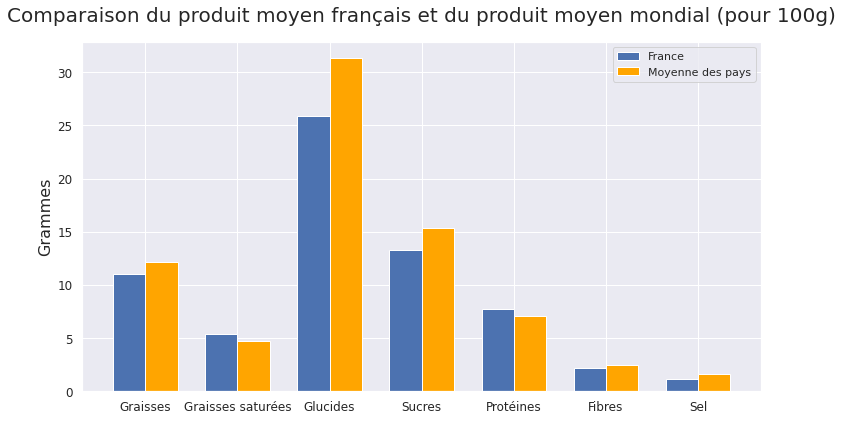

In [ ]:
#données
labels = nutricols[1:]
y_f = france[nutricols].mean().values[1:]
y_m = df[nutricols].mean().values[1:]

#setup
x = np.arange(len(labels))
width = 0.35

#plot
fig, ax = plt.subplots(figsize = (12, 6), facecolor='white')
rects1 = ax.bar(x - width/2, y_f, width, label='France')
rects2 = ax.bar(x + width/2, y_m, width, label='Moyenne des pays', color='orange')
ax.set_ylabel('Grammes', fontsize=16)
ax.set_title('Comparaison du produit moyen français et du produit moyen mondial (pour 100g)', 
             fontsize=20, y=1.04)
plt.xticks(x, labels)
ax.tick_params(labelsize=12)
ax.legend()
fig.tight_layout()

**France vs autres pays :**

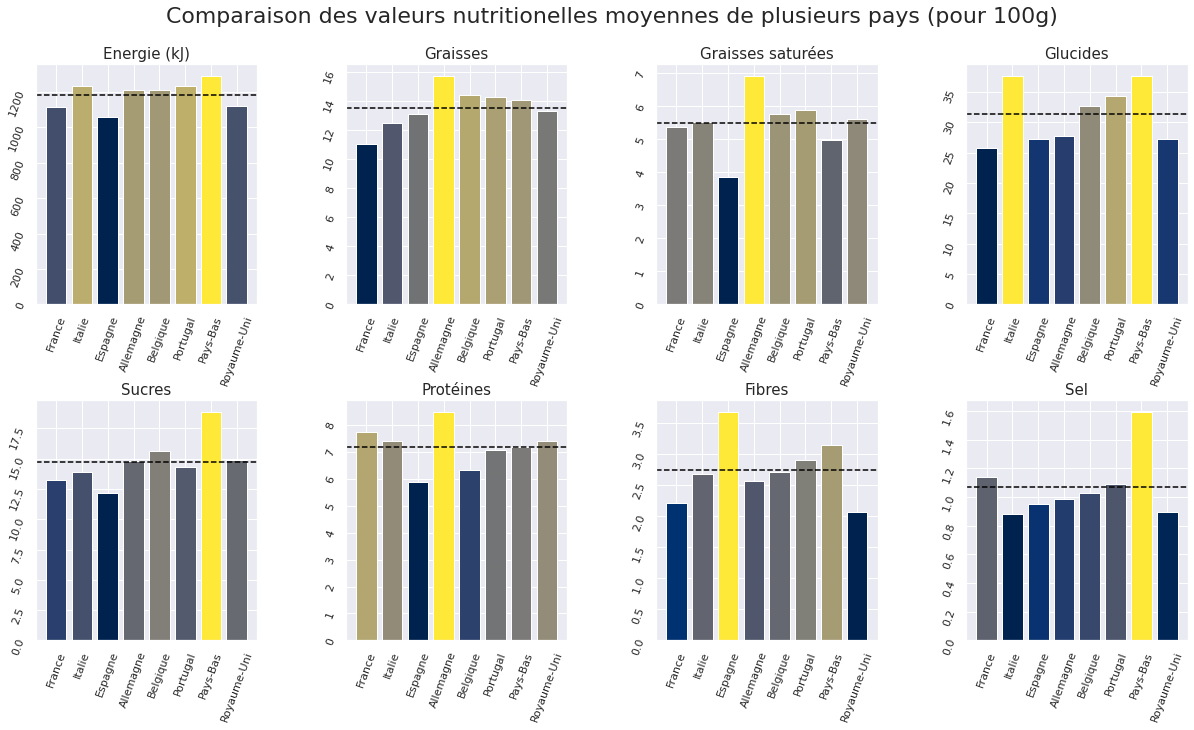

In [ ]:
#données
liste = ['france', 'italy', 'spain', 'germany', 'belgium', 'portugal', 'netherlands', 'united-kingdom']
x = np.arange(len(liste))
pays = ['France', 'Italie', 'Espagne', 'Allemagne', 'Belgique', 'Portugal', 'Pays-Bas', 'Royaume-Uni']
nutri = np.reshape(np.array(nutricols), (2,4))

#couleurs
colors = ['orange', 'goldenrod', 'lightsalmon', 'skyblue', 'coral', 'peru', 'forestgreen', 'lightskyblue']
colors = np.reshape(np.array(colors), (2,4))
cmap = plt.cm.get_cmap('cividis')

#plot
sns.set()
fig, ax = plt.subplots(2,4,figsize = (20, 10), facecolor='white')
fig.suptitle("Comparaison des valeurs nutritionelles moyennes de plusieurs pays (pour 100g)", fontsize=22)
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9,top=0.9,wspace=0.4,hspace=0.4)
for i in range(2):
  for j in range(4):
    temp = [df.loc[df['Pays'].str.contains(pay), nutri[i][j]].mean() for pay in liste]
    norm = mcolors.Normalize(min(temp), max(temp))
    colors = [cmap(norm(u)) for u in temp]
    ax[i][j].bar(pays, temp, color=colors)
    ax[i][j].axhline(y=np.mean(np.array(temp)), ls='--', color='black')
    ax[i][j].set_title(nutri[i][j], fontsize=15)
    ax[i][j].tick_params(labelrotation=70)


**Moyenne du nutriscore par pays :**

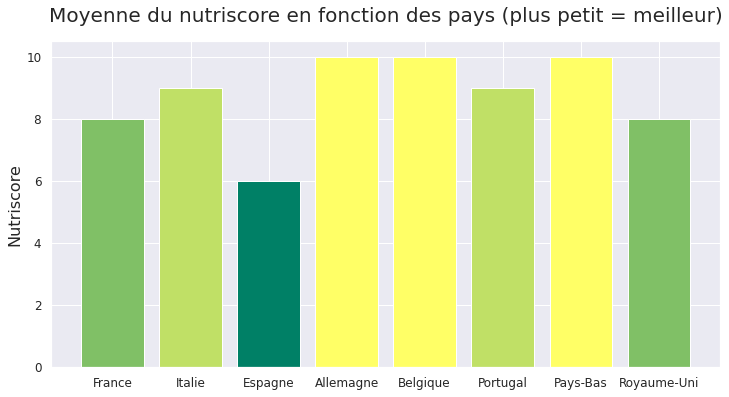

In [ ]:
#données
liste = ['france', 'italy', 'spain', 'germany', 'belgium', 'portugal', 'netherlands', 'united-kingdom']
pays = ['France', 'Italie', 'Espagne', 'Allemagne', 'Belgique', 'Portugal', 'Pays-Bas', 'Royaume-Uni']
y = [df.loc[df['Pays'].str.contains(pay), 'Nutriscore (Numérique)'].mean().round() for pay in liste]

#couleur
cmap = plt.cm.get_cmap('summer')
norm = mcolors.Normalize(min(y), max(y))
colors = [cmap(norm(u)) for u in y]

#plot
sns.set()
fig, ax = plt.subplots(figsize = (12, 6), facecolor='white')
plt.bar(pays, y, color=colors)
ax.set_ylabel('Nutriscore', fontsize=16)
ax.set_title('Moyenne du nutriscore en fonction des pays (plus petit = meilleur)', 
             fontsize=20, y=1.04)
ax.tick_params(labelsize=12)

**Nutriscore en fonction de la catégorie du produit :**

Text(0.5, 1.04, 'Moyenne du nutriscore en fonction de la catégorie du produit (plus petit = meilleur)')

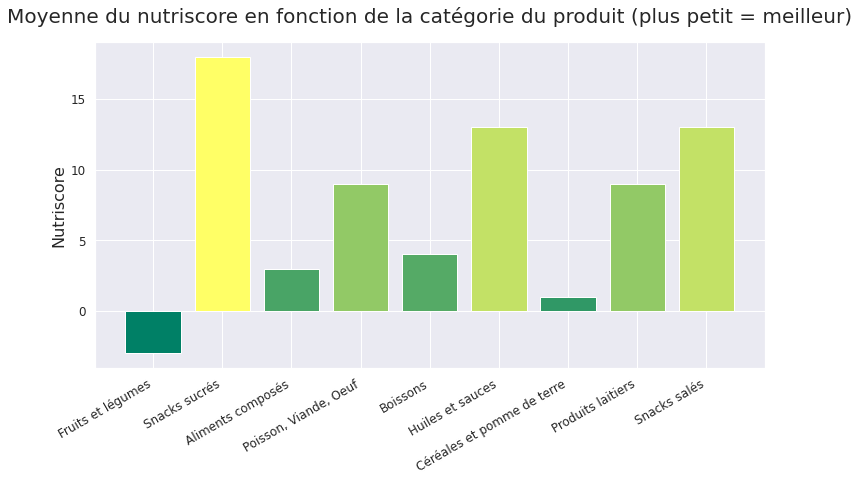

In [ ]:
# Changement de label pour certain groupes
df.loc[df['Groupe']=='fruits-and-vegetables', 'Groupe'] = 'Fruits and vegetables'
df.loc[df['Groupe']=='sugary-snacks', 'Groupe'] = 'Sugary snacks'
df.loc[df['Groupe']=='cereals-and-potatoes', 'Groupe'] = 'Cereals and potatoes'
df.loc[df['Groupe']=='salty-snacks', 'Groupe'] = 'Snacks salés'

#données
liste = ['Fruits and vegetables', 'Sugary snacks','Composite foods', 'Fish Meat Eggs', 'Beverages', 
         'Fat and sauces', 'Cereals and potatoes', 'Milk and dairy products', 'Salty snacks']
Liste = ['Fruits et légumes', 'Snacks sucrés', 'Aliments composés', 'Poisson, Viande, Oeuf', 
         'Boissons', 'Huiles et sauces', 'Céréales et pomme de terre', 'Produits laitiers', 'Snacks salés']
y = [df.loc[df['Groupe'].str.contains(group), 'Nutriscore (Numérique)'].mean().round() for group in liste]

# Couleurs
cmap = plt.cm.get_cmap('summer')
norm = mcolors.Normalize(min(y), max(y))
colors = [cmap(norm(u)) for u in y]

# Plot
sns.set()
fig, ax = plt.subplots(figsize = (12, 6), facecolor='white')
plt.bar(Liste, y, color=colors)
plt.xticks(rotation=30, ha='right')
ax.tick_params(labelsize=12)
ax.set_ylabel('Nutriscore', fontsize=16)
ax.set_title('Moyenne du nutriscore en fonction de la catégorie du produit (plus petit = meilleur)', 
             fontsize=20, y=1.04)

**Catégorie avec le plus de produit en vente :**

Text(0.5, 1.04, 'Nombre de produits en vente par catégorie')

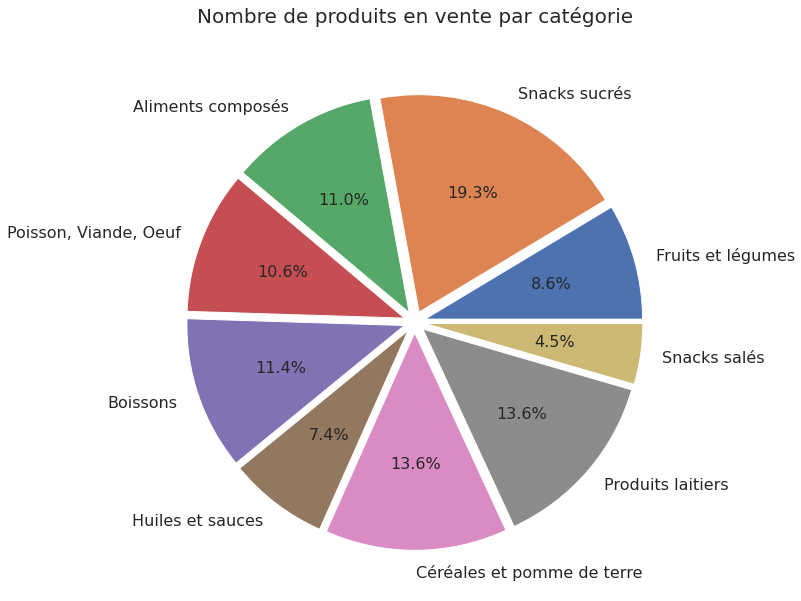

In [ ]:
#Liste des groupes
liste = ['Fruits and vegetables', 'Sugary snacks','Composite foods', 'Fish Meat Eggs', 'Beverages', 
         'Fat and sauces', 'Cereals and potatoes', 'Milk and dairy products', 'Salty snacks']
Liste = ['Fruits et légumes', 'Snacks sucrés', 'Aliments composés', 'Poisson, Viande, Oeuf', 
         'Boissons', 'Huiles et sauces', 'Céréales et pomme de terre', 'Produits laitiers', 'Snacks salés']

#Données
y = [df.loc[df['Groupe'].str.contains(group), 'Nutriscore (Numérique)'].count() for group in liste]
explode=[0.05 for i in y]

# Plot
sns.set()
fig, ax = plt.subplots(figsize = (10,10), facecolor='white')
plt.pie(y, labels=Liste, shadow=False, autopct='%1.1f%%', explode=explode, textprops={'size': 16})
ax.set_title('Nombre de produits en vente par catégorie', 
             fontsize=20, y=1.04)

**Catégorie avec le plus de produit en vente en France :**

Text(0.5, 1.04, 'Nombre de produits en vente par catégorie en France')

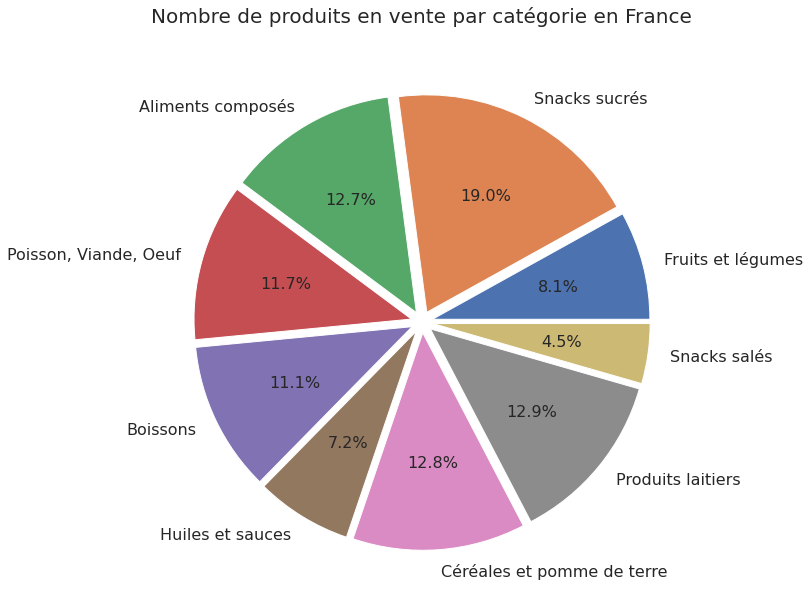

In [ ]:
#Liste des groupes
liste = ['Fruits and vegetables', 'Sugary snacks','Composite foods', 'Fish Meat Eggs', 'Beverages', 
         'Fat and sauces', 'Cereals and potatoes', 'Milk and dairy products', 'Salty snacks']
Liste = ['Fruits et légumes', 'Snacks sucrés', 'Aliments composés', 'Poisson, Viande, Oeuf', 
         'Boissons', 'Huiles et sauces', 'Céréales et pomme de terre', 'Produits laitiers', 'Snacks salés']

#Données
y = [df.loc[(df['Groupe'].str.contains(group)) & (df['Pays'].str.contains('france')), 'Nutriscore (Numérique)'].count() for group in liste]
explode=[0.05 for i in y]

# Plot
sns.set()
fig, ax = plt.subplots(figsize = (10,10), facecolor='white')
plt.pie(y, labels=Liste, shadow=False, autopct='%1.1f%%', explode=explode, textprops={'size': 16})
ax.set_title('Nombre de produits en vente par catégorie en France', 
             fontsize=20, y=1.04)

**Produits de nutriscore A :**

Text(0.5, 1, 'Proportion de produits en vente ayant un nutriscore A')

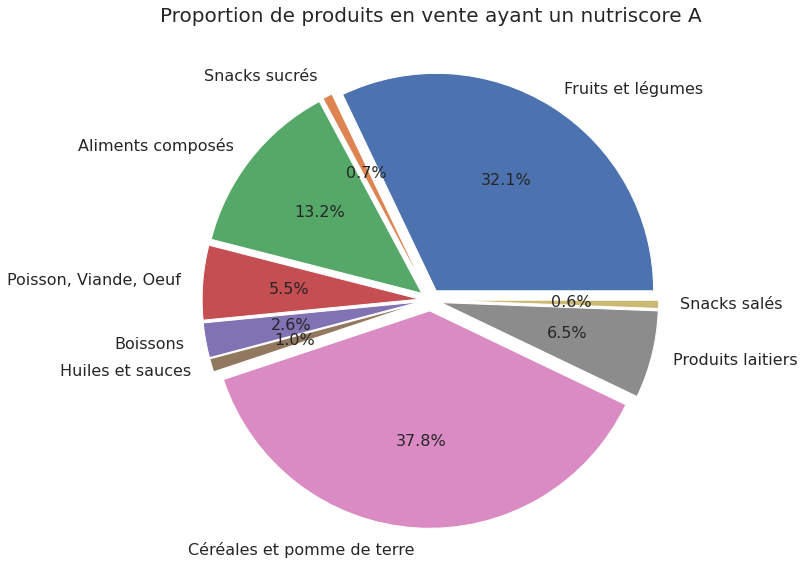

In [ ]:
#Liste des groupes
liste = ['Fruits and vegetables', 'Sugary snacks','Composite foods', 'Fish Meat Eggs', 'Beverages', 
         'Fat and sauces', 'Cereals and potatoes', 'Milk and dairy products', 'Salty snacks']
Liste = ['Fruits et légumes', 'Snacks sucrés', 'Aliments composés', 'Poisson, Viande, Oeuf', 
         'Boissons', 'Huiles et sauces', 'Céréales et pomme de terre', 'Produits laitiers', 'Snacks salés']

#Données
y = [df.loc[(df['Groupe'].str.contains(group)) & (df['Nutriscore'].str.contains('a')), 'Nutriscore'].count() for group in liste]
explode=[0.05 for i in y]

# Plot
sns.set()
fig, ax = plt.subplots(figsize = (10,10), facecolor='white')
plt.pie(y, labels=Liste, shadow=False, autopct='%1.1f%%', explode=explode, textprops={'size': 16})
ax.set_title('Proportion de produits en vente ayant un nutriscore A', 
             fontsize=20, y=1)

**Produits de nutriscore E :**

Text(0.5, 1, 'Proportion de produits en vente ayant un nutriscore E')

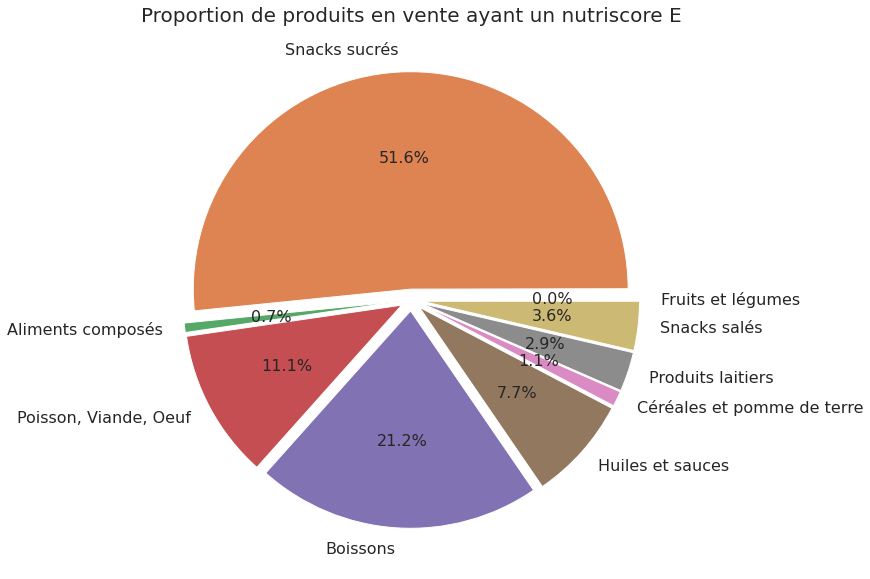

In [ ]:
#Liste des groupes
liste = ['Fruits and vegetables', 'Sugary snacks','Composite foods', 'Fish Meat Eggs', 'Beverages', 
         'Fat and sauces', 'Cereals and potatoes', 'Milk and dairy products', 'Salty snacks']
Liste = ['Fruits et légumes', 'Snacks sucrés', 'Aliments composés', 'Poisson, Viande, Oeuf', 
         'Boissons', 'Huiles et sauces', 'Céréales et pomme de terre', 'Produits laitiers', 'Snacks salés']

#Données
y = [df.loc[(df['Groupe'].str.contains(group)) & (df['Nutriscore'].str.contains('e')), 'Nutriscore'].count() for group in liste]
explode=[0.05 for i in y]

# Plot
sns.set()
fig, ax = plt.subplots(figsize = (10,10), facecolor='white')
plt.pie(y, labels=Liste, shadow=False, autopct='%1.1f%%', explode=explode, textprops={'size': 16})
ax.set_title('Proportion de produits en vente ayant un nutriscore E', 
             fontsize=20, y=1)

# **Partie 2 : Analyses bivariées**

**Matrice des corrélations :**

Text(0.5, 1.0, 'Correlation entre les variables nutritionelles')

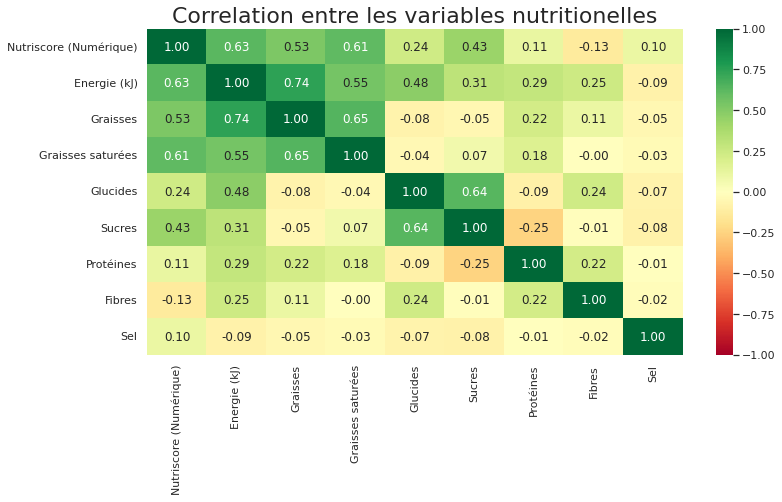

In [ ]:
cols = ['Nutriscore (Numérique)','Energie (kJ)', 'Graisses', 'Graisses saturées', 'Glucides', 'Sucres', 'Protéines','Fibres','Sel']
correlation = df[cols].corr(method='pearson')
sns.set()
fig, ax = plt.subplots(figsize = (12, 6))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap="RdYlGn", fmt="0.2f")
ax.set_title('Correlation entre les variables nutritionelles', fontsize=22)

**Correlation entre Energie et Nutriscore :**

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


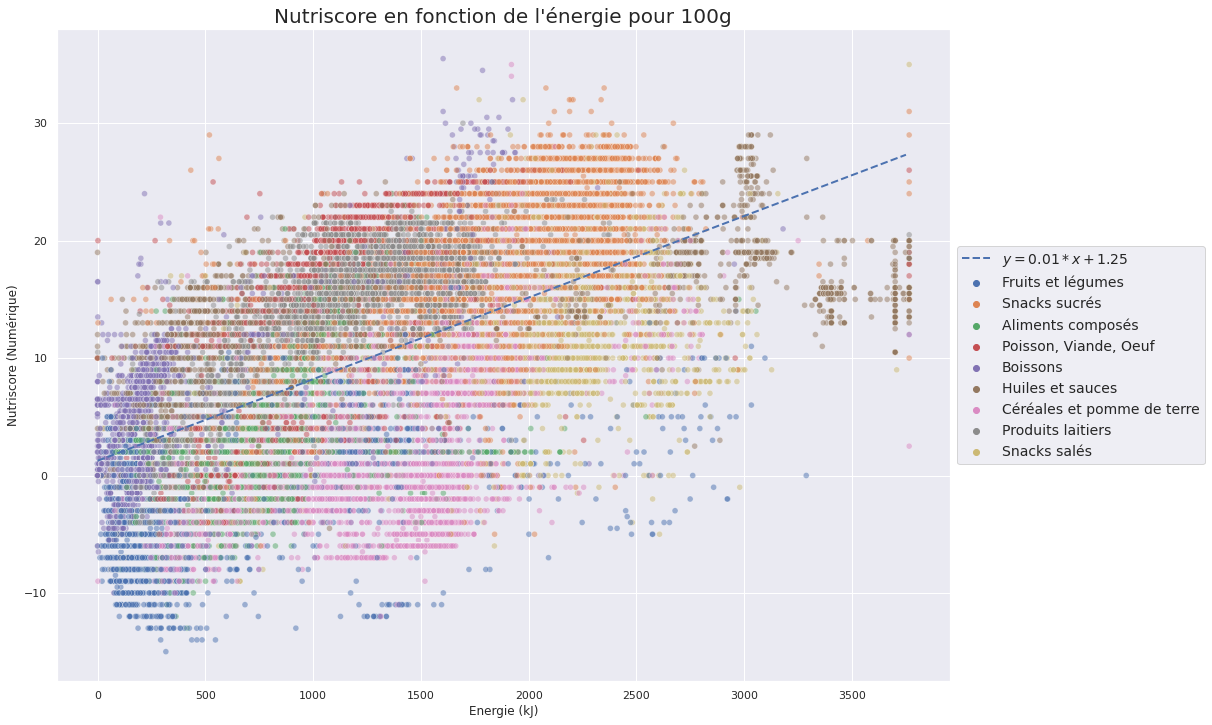

In [ ]:
# données
liste = ['Fruits and vegetables', 'Sugary snacks','Composite foods', 'Fish Meat Eggs', 'Beverages', 
         'Fat and sauces', 'Cereals and potatoes', 'Milk and dairy products', 'Salty snacks']
Liste = ['Fruits et légumes', 'Snacks sucrés', 'Aliments composés', 'Poisson, Viande, Oeuf', 
         'Boissons', 'Huiles et sauces', 'Céréales et pomme de terre', 'Produits laitiers', 'Snacks salés']

# subset a plot
temp = df.loc[~(df['Groupe']=='unknown')]
for i in range(len(liste)):
  temp.loc[temp['Groupe']==liste[i], 'Groupe'] = Liste[i]

# droite de regression : y=ax+b
a = df['Energie (kJ)'].cov(df['Nutriscore (Numérique)'])/df['Energie (kJ)'].var()
b = df['Nutriscore (Numérique)'].mean()-a*df['Energie (kJ)'].mean()
X = np.linspace(0,3750)
Y = a*X+b

# plot
sns.set()
fig, ax = plt.subplots(figsize = (16,12), facecolor='white')
sns.scatterplot('Energie (kJ)', 'Nutriscore (Numérique)', data=temp, hue='Groupe', alpha=0.5)
plt.plot(X,Y,ls='--', lw=2, label="$y={}*x + {}$".format(a.round(2),b.round(2)))
ax.set_title('Nutriscore en fonction de l\'énergie pour 100g', fontsize=20, y=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

**Corrélation entre Graisses saturées et Nutriscore :**

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


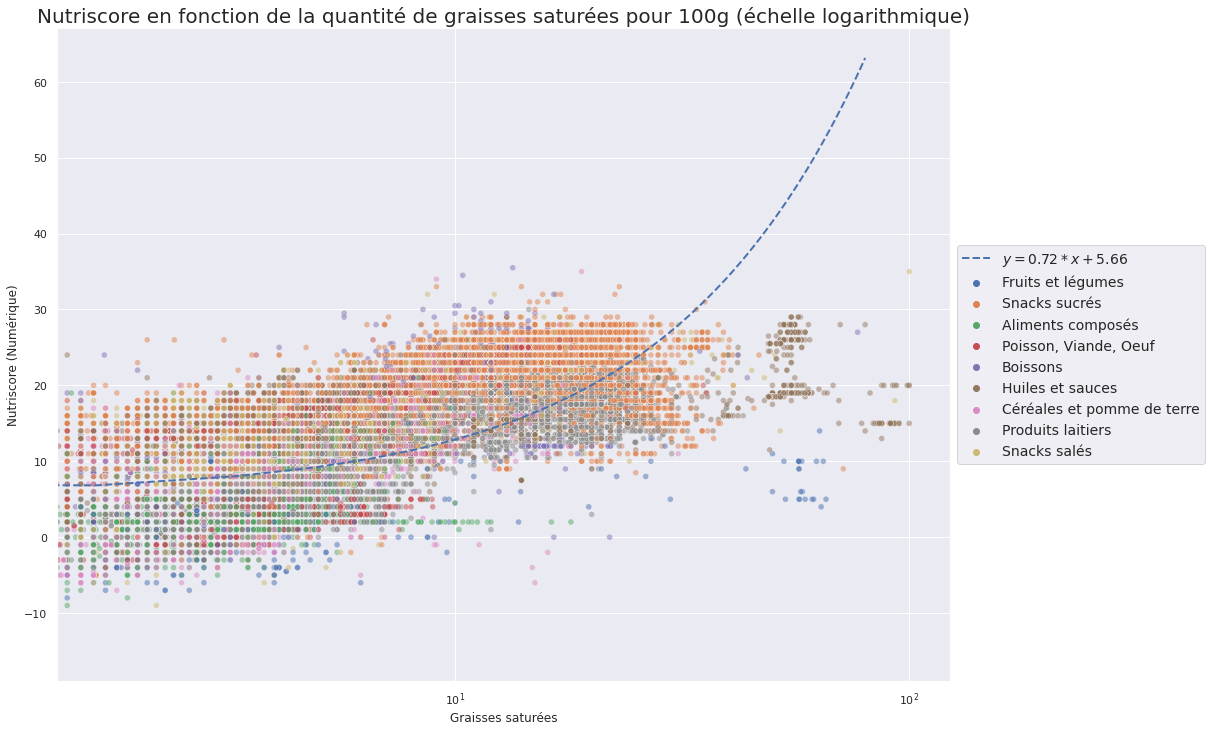

In [ ]:
# données
liste = ['Fruits and vegetables', 'Sugary snacks','Composite foods', 'Fish Meat Eggs', 'Beverages', 
         'Fat and sauces', 'Cereals and potatoes', 'Milk and dairy products', 'Salty snacks']
Liste = ['Fruits et légumes', 'Snacks sucrés', 'Aliments composés', 'Poisson, Viande, Oeuf', 
         'Boissons', 'Huiles et sauces', 'Céréales et pomme de terre', 'Produits laitiers', 'Snacks salés']

# subset a plot
temp = df.loc[~(df['Groupe']=='unknown')]
for i in range(len(liste)):
  temp.loc[temp['Groupe']==liste[i], 'Groupe'] = Liste[i]

# droite de regression : y=ax+b
a = df['Graisses saturées'].cov(df['Nutriscore (Numérique)'])/df['Graisses saturées'].var()
b = df['Nutriscore (Numérique)'].mean()-a*df['Graisses saturées'].mean()
X = np.linspace(0,80)
Y = a*X+b

# plot
sns.set()
fig, ax = plt.subplots(figsize = (16,12), facecolor='white')
sns.scatterplot('Graisses saturées', 'Nutriscore (Numérique)', data=temp, hue='Groupe', alpha=0.5)
plt.plot(X,Y,ls='--', lw=2, label="$y={}*x + {}$".format(a.round(2),b.round(2)))
ax.set_title('Nutriscore en fonction de la quantité de graisses saturées pour 100g (échelle logarithmique)', fontsize=20, y=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.xscale("log")

**Correlation entre sucre et nutriscore :**

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


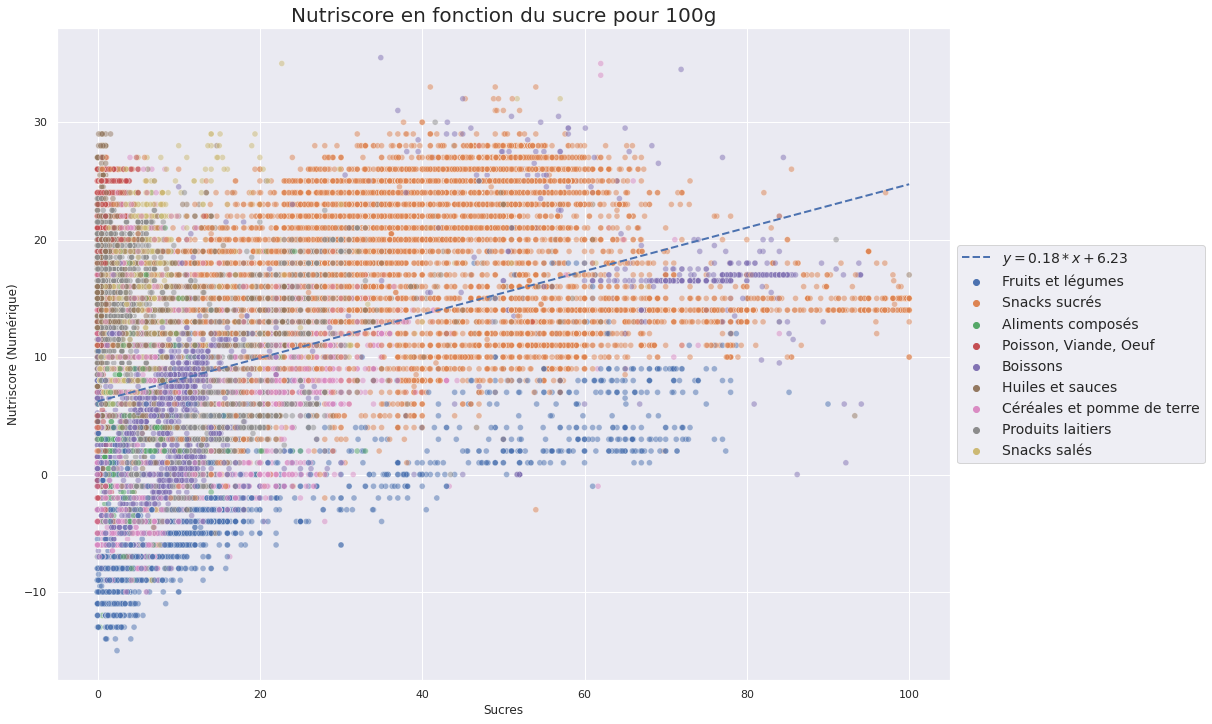

In [ ]:
# données
liste = ['Fruits and vegetables', 'Sugary snacks','Composite foods', 'Fish Meat Eggs', 'Beverages', 
         'Fat and sauces', 'Cereals and potatoes', 'Milk and dairy products', 'Salty snacks']
Liste = ['Fruits et légumes', 'Snacks sucrés', 'Aliments composés', 'Poisson, Viande, Oeuf', 
         'Boissons', 'Huiles et sauces', 'Céréales et pomme de terre', 'Produits laitiers', 'Snacks salés']

# subset a plot
temp = df.loc[~(df['Groupe']=='unknown')]
for i in range(len(liste)):
  temp.loc[temp['Groupe']==liste[i], 'Groupe'] = Liste[i]

# droite de regression : y=ax+b
a = df['Sucres'].cov(df['Nutriscore (Numérique)'])/df['Sucres'].var()
b = df['Nutriscore (Numérique)'].mean()-a*df['Sucres'].mean()
X = np.linspace(0,100)
Y = a*X+b

# plot
sns.set()
fig, ax = plt.subplots(figsize = (16,12), facecolor='white')
sns.scatterplot('Sucres', 'Nutriscore (Numérique)', data=temp, hue='Groupe', alpha=0.5)
plt.plot(X,Y,ls='--', lw=2, label="$y={}*x + {}$".format(a.round(2),b.round(2)))
ax.set_title('Nutriscore en fonction du sucre pour 100g', fontsize=20, y=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

**ANOVA : la catégorie de produit influence la valeur du nutriscore ?**

In [ ]:
liste = ['Fruits and vegetables', 'Sugary snacks','Composite foods', 'Fish Meat Eggs', 'Beverages', 
         'Fat and sauces', 'Cereals and potatoes', 'Milk and dairy products', 'Salty snacks']
#liste des données à comparer
temp = [df.loc[df['Groupe']==group, 'Nutriscore (Numérique)'].values for group in liste]

#test anova
fvalue, pvalue = stats.f_oneway(temp[0], temp[1], temp[2], temp[3], temp[4], temp[5], temp[6], temp[7], temp[8])
print("F-Value :", fvalue, " p-value :", pvalue)

F-Value : 6425.629087297233  p-value : 0.0


Le test est sans appel : probabilité nulle que chaque catégorie d'aliment aient la même moyenne pour le nutriscore. 
Donc le nutriscore est statistiquement prouvé étant dépendant de la catégorie. 

**ANOVA : y a-t-il un lien significatif entre les pays et la valeur du nutriscore ?**

In [ ]:
liste = ['france', 'italy', 'spain', 'germany', 'belgium', 'portugal', 'netherlands', 'united-kingdom']
#liste des données à comparer
temp = [df.loc[df['Pays'].str.contains(pay), 'Nutriscore (Numérique)'].values for pay in liste]

#test anova
fvalue, pvalue = stats.f_oneway(temp[0], temp[1], temp[2], temp[3], temp[4], temp[5], temp[6], temp[7])
print("F-Value :", fvalue, " p-value :", pvalue)

F-Value : 60.16289533952607  p-value : 1.2157049918268089e-86


Le test est sans appel : probabilité quasi nulle que chaque pays aient la même moyenne pour le nutriscore. Donc le nutriscore est statistiquement prouvé étant dépendant du pays.

**Khi-2 : Les catégories sont elles correllées aux pays ?**

In [ ]:
liste = ['Fruits and vegetables', 'Sugary snacks','Composite foods', 'Fish Meat Eggs', 'Beverages', 
         'Fat and sauces', 'Cereals and potatoes', 'Milk and dairy products', 'Salty snacks']
liste2 = ['france', 'italy', 'spain', 'germany', 'belgium', 'portugal', 'netherlands', 'united-kingdom']

# tableau du Khi-2 : lignes = catégories du produit et colonnes = pays
# donc array de 9x8 dont chaque case contient le nombre de produit de catégorie i dans le pays j
Mat = np.zeros((9,8))
for i in range(9):
  for j in range(8) :
    Mat[i,j] = df.loc[(df['Groupe']==liste[i])&(df['Pays'].str.contains(liste2[j])), 'Nutriscore'].count()

#test Khi-2
khi2, p, dof, expeted = stats.chi2_contingency(Mat)

print("Khi-2 :", khi2, " p-value :", p)

Khi-2 : 2861.9656799337954  p-value : 0.0


Le test est sans appel : probabilité nulle que les pays et les groupes d'aliments soient des variables indépednantes. 

# **Partie 3 : Analyse en composantes principales**

**Selection des données de l'ACP :**

In [ ]:
cols = ['Energie (kJ)', 'Graisses', 'Graisses saturées', 'Glucides', 'Sucres','Protéines','Fibres','Sel', 'Nutriscore (Numérique)']
mat = df[cols]
features = mat.columns
index = mat.index
mat.head(2)

Energie (kJ)  Graisses  Graisses saturées  Glucides  Sucres  Protéines  \
0        2243.0     28.57              28.57     64.29   14.29       3.57   
1        1941.0     17.86               0.00     60.71   17.86      17.86   

   Fibres    Sel  Nutriscore (Numérique)  
0     3.6  0.000                    14.0  
1     7.1  0.635                     0.0

**Construction de l'ACP :**

Text(0.5, 1.0, 'Eboulis des valeurs propres')

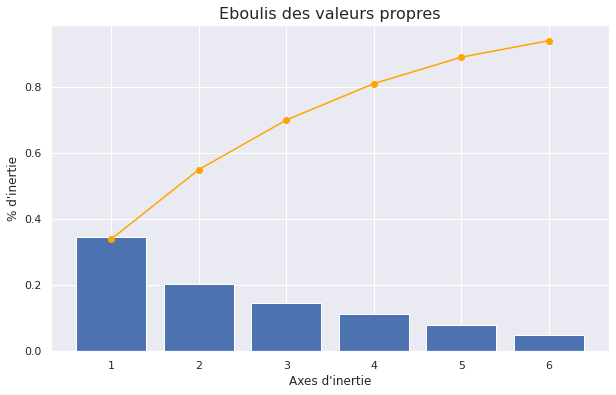

In [ ]:
mat = mat.values

#reduction et centrage des données
scaler = StandardScaler()
mat_scaled = scaler.fit_transform(mat)

#pca
n_comp = 6
pca = PCA(n_components=n_comp)
pca.fit(mat_scaled)

#variances
ax_var = pca.explained_variance_ratio_
ax_var_cum = ax_var.cumsum().round(2)

#digramme des eboulis des valeurs propres
x = range(1, n_comp+1)
sns.set()
fig, ax = plt.subplots(figsize = (10,6), facecolor='white')
ax.bar(x, ax_var)
ax.plot(x, ax_var_cum,c="orange",marker='o')
plt.xlabel("Axes d'inertie")
plt.ylabel("% d'inertie")
plt.title("Eboulis des valeurs propres", fontsize=16)

**Axes d'inertie :**

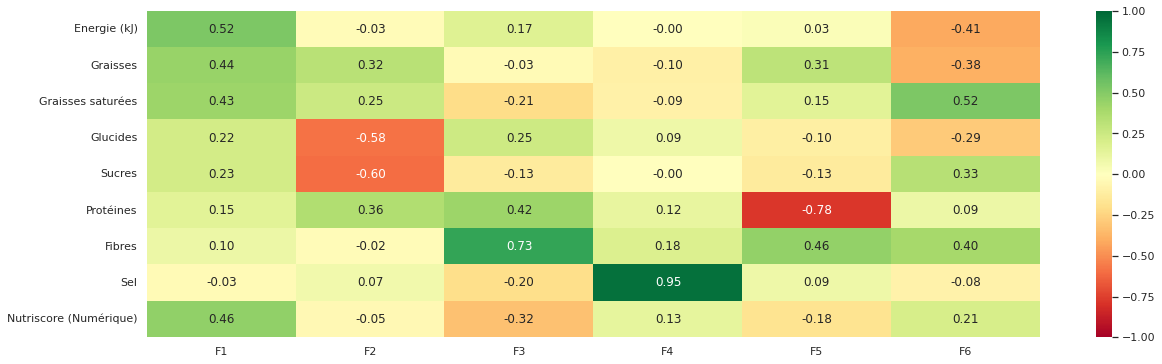

In [ ]:
#Coefficients des axes principaux d'inertie
pca_composantes = pd.DataFrame(pca.components_)
pca_composantes.columns = features
pca_composantes.index = [f"F{i}" for i in x]

#plot des coefficients
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pca_composantes.T, vmin=-1, vmax=1, annot=True, cmap="RdYlGn", fmt="0.2f")

**Représentation des features dans le premier plan factoriel :**

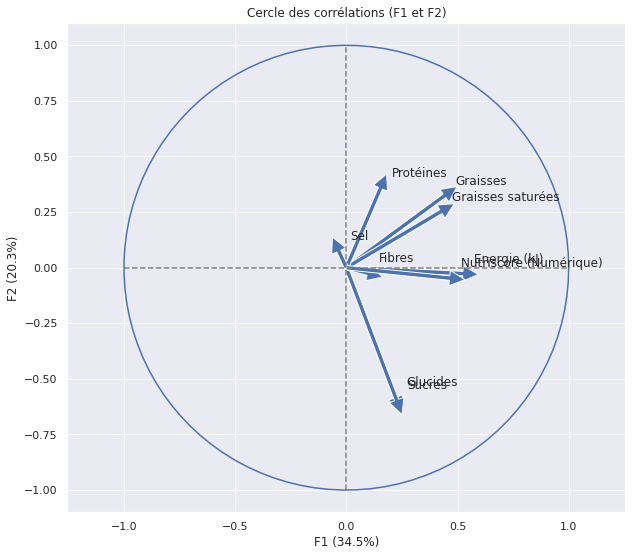

In [ ]:
x, y = 0,1
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[x, i],  #0 for PC1
             pca.components_[y, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[x, i] + 0.05,
             pca.components_[y, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(x+2, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

**Représentation des features dans le deuxième plan factoriel :**

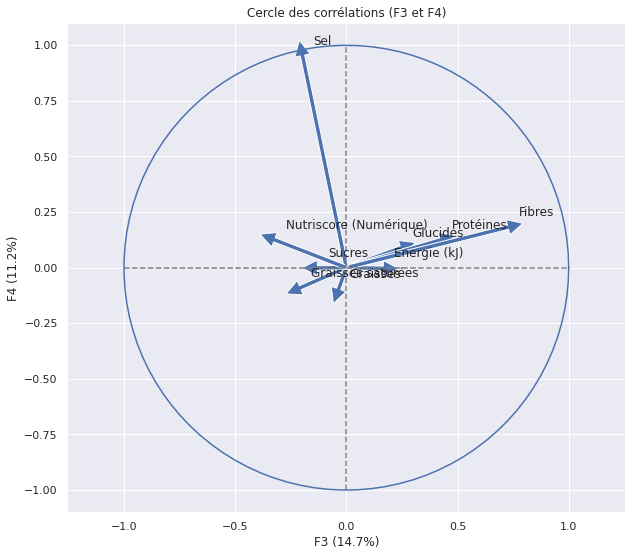

In [ ]:
x, y = 2,3
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[x, i],  #0 for PC1
             pca.components_[y, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[x, i] + 0.05,
             pca.components_[y, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(x+2, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

**Représentation des features dans le troisième plan factoriel :**

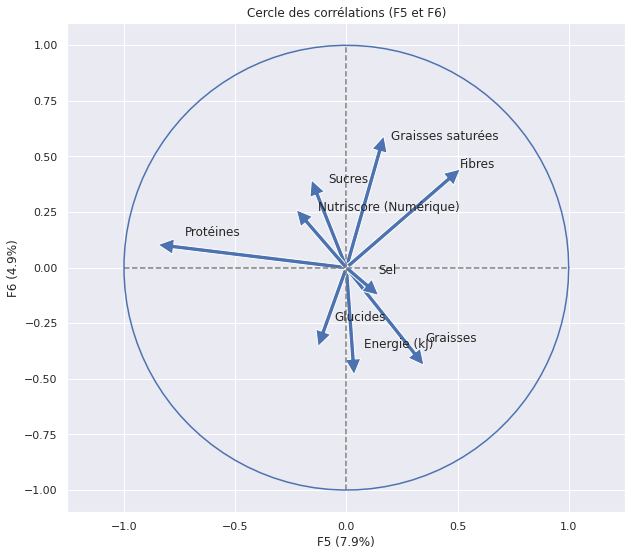

In [ ]:
x, y = 4,5
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[x, i],  #0 for PC1
             pca.components_[y, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[x, i] + 0.05,
             pca.components_[y, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(x+2, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

**Interprétation des axes d'inertie :**

*   Axe 1 : très peu correlé avec le sel et les fibres et corrélé positivement avec toutes les autres grandeurs nutritionelles. </br>
   Interprétation : représente la qualité energétique du produit
*   Axe 2 : Corrélé positivement avec les graisses et protéines, corrélé négativement avec les glucides, peu correlé avec les autres informations nutritionelles. </br> 
  Interprétation : représente la satiété renssentie à la consomation du produit (les glucides donnent un sentiment faible de satiété alors que les graisses et les protéines un sentiment plus fort)
*   Axe 3 : très corrélé positivement avec les fibres et protéines, peu corrélé avec le reste des variables. </br>
   Interprétation : représente la verdure d'un aliment (les légumes et fruits contiennent beaucoup de fibres et peuvent pour certains contenir des protéines)

In [ ]:
mat_proj = pca.transform(mat_scaled)
data = df[['Produit', 'Groupe']]
data['Energie'] = mat_proj[:,0].tolist()
data['Satiété'] = mat_proj[:,1].tolist()
data['Verdure'] = mat_proj[:,2].tolist()
data['Sel'] = mat_proj[:,3].tolist()
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

Produit   Groupe   Energie   Satiété   Verdure  \
0     Banana Chips Sweetened (Whole)  unknown  2.979867  0.219166 -0.285577   
1                            Peanuts  unknown  0.511419 -0.271036  2.256139   
2             Organic Salted Nut Mix  unknown  2.365645  1.875172  1.413764   
3                    Organic Polenta  unknown  0.190179 -0.945438  1.322826   
4  Breadshop Honey Gone Nuts Granola  unknown  0.982493 -0.319143  1.812868   

        Sel  
0 -0.448219  
1  0.208807  
2  0.041497  
3  0.251340  
4  0.272253

**Projection dans le premier plan factoriel :**

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(-4.0, 5.0)

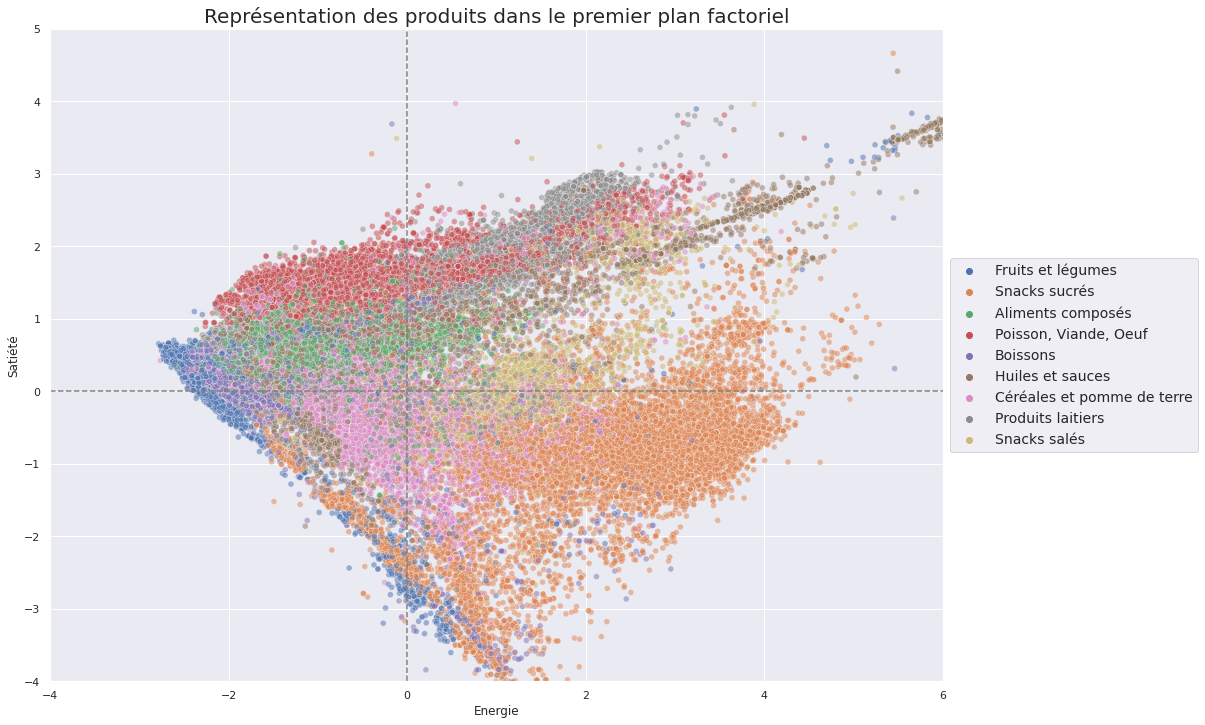

In [ ]:
# données
liste = ['Fruits and vegetables', 'Sugary snacks','Composite foods', 'Fish Meat Eggs', 'Beverages', 
         'Fat and sauces', 'Cereals and potatoes', 'Milk and dairy products', 'Salty snacks']
Liste = ['Fruits et légumes', 'Snacks sucrés', 'Aliments composés', 'Poisson, Viande, Oeuf', 
         'Boissons', 'Huiles et sauces', 'Céréales et pomme de terre', 'Produits laitiers', 'Snacks salés']

# subset a plot
temp = data.loc[~(df['Groupe']=='unknown')]
for i in range(len(liste)):
  temp.loc[temp['Groupe']==liste[i], 'Groupe'] = Liste[i]

# plot
sns.set()
fig, ax = plt.subplots(figsize = (16,12), facecolor='white')
plt.plot([-4, 6], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-4, 6], color='grey', ls='--')
sns.scatterplot('Energie', 'Satiété', data=temp, hue='Groupe', alpha=0.5)

ax.set_title('Représentation des produits dans le premier plan factoriel', fontsize=20, y=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.xlim([-4,6])
plt.ylim([-4,5])

**Projection des produits dans le deuxième plan factoriel :**

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(-2.0, 2.0)

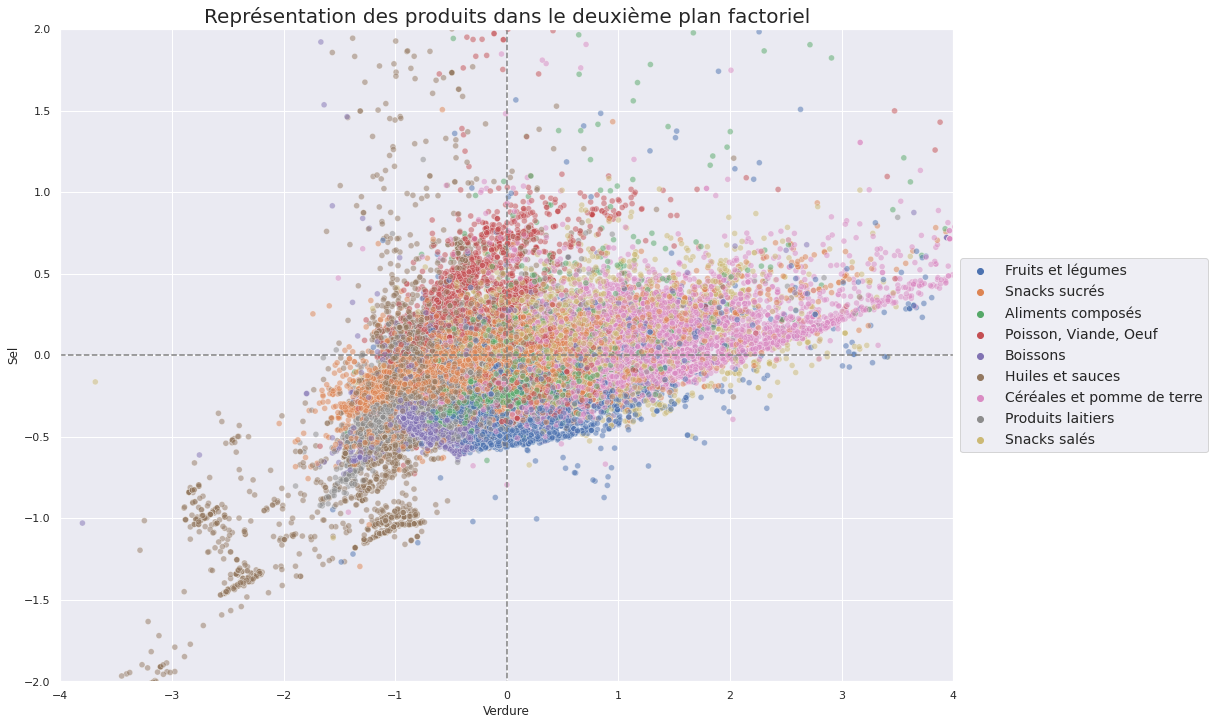

In [ ]:
# données
liste = ['Fruits and vegetables', 'Sugary snacks','Composite foods', 'Fish Meat Eggs', 'Beverages', 
         'Fat and sauces', 'Cereals and potatoes', 'Milk and dairy products', 'Salty snacks']
Liste = ['Fruits et légumes', 'Snacks sucrés', 'Aliments composés', 'Poisson, Viande, Oeuf', 
         'Boissons', 'Huiles et sauces', 'Céréales et pomme de terre', 'Produits laitiers', 'Snacks salés']

# subset a plot
temp = data.loc[~(df['Groupe']=='unknown')]
for i in range(len(liste)):
  temp.loc[temp['Groupe']==liste[i], 'Groupe'] = Liste[i]

# plot
sns.set()
fig, ax = plt.subplots(figsize = (16,12), facecolor='white')
plt.plot([-4, 7], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-4, 6], color='grey', ls='--')
sns.scatterplot('Verdure', 'Sel', data=temp, hue='Groupe', alpha=0.5)

ax.set_title('Représentation des produits dans le deuxième plan factoriel', fontsize=20, y=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

plt.xlim([-4,4])
plt.ylim([-2,2])

# **Partie 4 : Fonctions prototypes de l'application**

L'application se base sur deux principes :
*   Noter un panier de courses 
*   Suggerer un produit alternatif pour les produits avec un nutriscore D et E

**Noter un panier de courses :** 

Entrée : Liste des codes barres de produits scannées <br>
Sortie : Liste des noms des produits, leurs nutriscore, le nutriscore de la liste

In [ ]:
def note(codes):
  print("---------- Erreurs : --------------------")
  # si pas d'articles dans la liste
  if len(codes)==0:
    print('Aucun article dans la liste')
    return
  
  # initialisation des liste de données
  nutriscores_num = []
  nutriscores = []
  names = []
  
  # selection des données présentes dans la base de données et message d'erreur pour les autres
  for code in codes:
    if code in df['Code'].unique():
      nutriscores.append(df.loc[df['Code']==code, 'Nutriscore'].values)
      nutriscores_num.append(float(df.loc[df['Code']==code, 'Nutriscore (Numérique)'].values))
      names.append(df.loc[df['Code']==code, 'Produit'].values)
    else:
      print("Le produit avec le code barre {} n'est pas dans la base de données".format(code))
  
  if len(nutriscores_num)==0:
    return

  # calcul du nutriscore du panier
  mean = float(sum(nutriscores_num)/len(nutriscores_num))
  if mean<=-1:
    nutriscore = 'A'
  elif mean<=2:
    nutriscore = 'B'
  elif mean<=10:
    nutriscore = 'C'
  elif mean<=18:
    nutriscore = 'D'
  else:
    nutriscore = 'E'
  
  # affichage des produits et leur nutriscore
  print("\n ---------- Liste des produits : -------------")
  for produit, nutri in zip(names, nutriscores):
    print("{} de nutriscore {}".format(produit, nutri))
  
  # affichage de la note du panier
  print("\n ---------- Score du panier : ----------------")
  print("Panier de nutriscore {}".format(nutriscore))
  return

In [ ]:
liste = []
note(liste)

---------- Erreurs : --------------------
Aucun article dans la liste


In [ ]:
liste = ['156']
note(liste)

---------- Erreurs : --------------------
Le produit avec le code barre 156 n'est pas dans la base de données


In [ ]:
liste = ['4530', '4559', '16087']
note(liste)

---------- Erreurs : --------------------

 ---------- Liste des produits : -------------
['Banana Chips Sweetened (Whole)'] de nutriscore ['d']
['Peanuts'] de nutriscore ['b']
['Organic Salted Nut Mix'] de nutriscore ['d']

 ---------- Score du panier : ----------------
Panier de nutriscore C


In [ ]:
liste = ['18197', '18227', '18265', '18289', '18319', '11150039932', '11150039949', '11150039956', '11150039987',
       '11150040006', '11150040037', '15562454']
note(liste)

---------- Erreurs : --------------------
Le produit avec le code barre 15562454 n'est pas dans la base de données

 ---------- Liste des produits : -------------
['Lotus Organic Brown Jasmine Rice'] de nutriscore ['c']
['Organic Oat Groats'] de nutriscore ['a']
['Energy Power Mix'] de nutriscore ['d']
['Antioxidant Mix - Berries & Chocolate'] de nutriscore ['d']
['Organic Quinoa Coconut Granola With Mango'] de nutriscore ['c']
['Garbanzo Beans'] de nutriscore ['a']
['Light Red Kidney Beans'] de nutriscore ['a']
['Chili Bean Soup Mix'] de nutriscore ['a']
['Navy Beans'] de nutriscore ['a']
['Pinto Beans'] de nutriscore ['a']
['Red Lentils'] de nutriscore ['a']

 ---------- Score du panier : ----------------
Panier de nutriscore B


**Suggestion des produits :**

Entrée : Liste des codes barres des produits scannées <br>
Sortie : Produits avec nutriscore D ou E du panier, liste de 5 éléments de la même catégorie de produit ayant un nutriscore A, B ou C quand c'est possible

In [ ]:
def suggest(codes):
  print("------------- Erreurs : ---------------------------")
  # stopper si aucun article dans la liste
  if len(codes)==0:
    print('Aucun article dans la liste')
    return
  
  # initialisation des listes de données
  code_list = []
  nutriscores = []
  names = []
  sgroups = []
  codes_df = df['Code'].unique()

  # vérification des produits dans la base de données et ayant un nutriscore D et E
  for code in codes:
    if code in codes_df :
      if (df.loc[df['Code']==code, 'Nutriscore (Numérique)']>10).any():
        code_list.append(code)
        nutriscores.append(df.loc[df['Code']==code, 'Nutriscore'].values)
        names.append(df.loc[df['Code']==code, 'Produit'].values)
        sgroups.append(df.loc[df['Code']==code, 'Sous-groupe'].values)
    else :
      print("Le produit avec le code barre {} n'est pas dans la base de données".format(code))

  # Affichage des suggestions
  for code, nutri, produit, group in zip(code_list, nutriscores, names, sgroups) :
    print('\n ------ Suggestions pour {} de nutriscore {} :'.format(produit, nutri))
    if "".join(group)=='unknown':
      print('Aucune suggestion pour ce produit')
    else:
      x="".join(group)
      temp = df.loc[df['Sous-groupe']==x]
      temp = temp[['Code','Produit', 'Nutriscore', 'Nutriscore (Numérique)', 'Sous-groupe']]
      temp = temp.sort_values('Nutriscore (Numérique)', ascending=True)
      temp = temp[['Code', 'Produit', 'Nutriscore']]
      print(temp.head(7))


In [ ]:
liste = []
suggest(liste)

---------- Erreurs : --------------------
Aucun article dans la liste


In [ ]:
liste = ['18197', '18227', '18265', '18289', '18319', '11150039932', '11150039949', '11150039956', '11150039987',
       '11150040006', '11150040037','18197', '18227', '11815', '13628', '16063', '227', '25157', '31858',
       '33046', '36559', '53327', '54379', '15562454']
suggest(liste)

------------- Erreurs : ---------------------------
Le produit avec le code barre 15562454 n'est pas dans la base de données

 ------ Suggestions pour ['Energy Power Mix'] de nutriscore ['d'] :
Aucune suggestion pour ce produit

 ------ Suggestions pour ['Antioxidant Mix - Berries & Chocolate'] de nutriscore ['d'] :
Aucune suggestion pour ce produit

 ------ Suggestions pour ['Stem Ginger Dunkers'] de nutriscore ['e'] :
                 Code                                            Produit  \
201860  3300087015124                                      Coeur Caramel   
201859  3300087004128                                    Coeur Framboise   
201851  3300081002205             Le Craquelins de Saint Malo Gout Sucré   
201850  3300081001208                Les Craquelins de Saint Malo Nature   
253726  8412170025783                                        Cooki sanas   
220877  3760081800216                                      Smart Pancake   
206971  3423720001145  Biscuit Nature et Bie